dataset : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

## Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 
- Root-Mean-Squared-Error (RMSE)

## Colleccting the Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## EDA

In [3]:
train.info()
train.head()
#예측해야하는 피쳐 train[:,-1] = SalePrice
#int, object 혼재
#결측치 있음 >> 결측확인 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()
#카테고리형 데이터일 수도 있는 것 = OverallQual, OverallCond, MoSold, ... 전체 확인 불가. 데이터 나눠서 보기

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
train.iloc[:,:20].head()
#uniqe한 값을 갖는 것 = Id
#카테고리형이 많은 object로 된 것은 수치화 필요 : train[train.dtypes[train.dtypes=="object"].index]
#스케일링 필요해보이는 피처 : MSSubClass(구간 차이가 너무 큼), LotFrontage, LotArea
#Alley의 경우 NaN값이 유의미(0으로 치환)
#HouseStyle / MSSubClass 유사해보이는 피처 정리할 것 (지어진 연도, 리모델링 까지도 확인)
#연도 데이터 따로 정리할 것 : YearBuilt, YearRemodAdd, GarageYrBlt, YrSold >> 구간화 / MoSold 월이 필요한가 의문

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000


In [7]:
train.iloc[:,20:40].head()

,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA
1,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA
2,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA
3,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA
4,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA


In [8]:
train.iloc[:,40:60].head()

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
0,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0
1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0
2,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0
3,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0
4,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0


In [9]:
train.iloc[:,60:-1].head()

,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
#오브젝트 col, 수치형 col 구분
object_features = test.dtypes[test.dtypes=="object"].index
numeric_features = test.dtypes[test.dtypes!="object"].index

#### 1-1. 결측치 확인

In [11]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
train_test = train.append(test)
nan_dict = {"CNT":train_test.isna().sum(),
            "RATE": train_test.isna().sum()/train_test.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

               CNT       RATE
PoolQC        2909  99.657417
MiscFeature   2814  96.402878
Alley         2721  93.216855
Fence         2348  80.438506
SalePrice     1459  49.982871
FireplaceQu   1420  48.646797
LotFrontage    486  16.649538
GarageCond     159   5.447071
GarageYrBlt    159   5.447071
GarageFinish   159   5.447071
GarageQual     159   5.447071
GarageType     157   5.378554
BsmtExposure    82   2.809181
BsmtCond        82   2.809181
BsmtQual        81   2.774923
BsmtFinType2    80   2.740665
BsmtFinType1    79   2.706406
MasVnrType      24   0.822199
MasVnrArea      23   0.787941
MSZoning         4   0.137033
Functional       2   0.068517
BsmtHalfBath     2   0.068517
BsmtFullBath     2   0.068517
Utilities        2   0.068517
KitchenQual      1   0.034258
TotalBsmtSF      1   0.034258
BsmtUnfSF        1   0.034258
GarageCars       1   0.034258
GarageArea       1   0.034258
BsmtFinSF2       1   0.034258
BsmtFinSF1       1   0.034258
Exterior2nd      1   0.034258
Exterior1s

#### 1-2.결측치 있는 데이터 내용 확인

In [13]:
train[["MSZoning","Functional","BsmtHalfBath","BsmtFullBath","Utilities","KitchenQual","TotalBsmtSF","BsmtUnfSF","GarageCars",
      "GarageArea","BsmtFinSF2","BsmtFinSF1","Exterior2nd","Exterior1st","SaleType","Electrical"]].head()

,MSZoning,Functional,BsmtHalfBath,BsmtFullBath,Utilities,KitchenQual,TotalBsmtSF,BsmtUnfSF,GarageCars,GarageArea,BsmtFinSF2,BsmtFinSF1,Exterior2nd,Exterior1st,SaleType,Electrical
0,RL,Typ,0,1,AllPub,Gd,856,150,2,548,0,706,VinylSd,VinylSd,WD,SBrkr
1,RL,Typ,1,0,AllPub,TA,1262,284,2,460,0,978,MetalSd,MetalSd,WD,SBrkr
2,RL,Typ,0,1,AllPub,Gd,920,434,2,608,0,486,VinylSd,VinylSd,WD,SBrkr
3,RL,Typ,0,1,AllPub,Gd,756,540,3,642,0,216,Wd Shng,Wd Sdng,WD,SBrkr
4,RL,Typ,0,1,AllPub,Gd,1145,490,3,836,0,655,VinylSd,VinylSd,WD,SBrkr


In [14]:
train[["PoolArea","PoolQC"]]
#PoolQC결측치 너무 많음 >> 수영장 사이즈가 없을 때 >> PoolArea사이즈보다 퀄리티 평가가 더 유의미할 것같음
#이런식으로 건물이 가지고 있지 않은 인프라에 대해 NaN값이 도출되는 경우가 많다 >> 하지만 다른 수치형 데이터에서 분명히 제공하고 있는 부분이 있으므로 Na값이 50퍼센트 이상인 것은 삭제해도 될듯

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1455,0,NaN
1456,0,NaN
1457,0,NaN
1458,0,NaN


In [15]:
# #결측치가 있는 피쳐(object) >> 'None으로 대체' >> 피쳐 확인 결과 의미있는 None (결측이 아님)
# for col in object_features:
#     train[col].fillna('None',inplace=True)
#     test[col].fillna('None',inplace=True)

In [16]:
# for col in numeric_features:
#     train[col].fillna(0,inplace=True)
#     test[col].fillna(0,inplace=True)

In [17]:
#결측치가 48퍼센트 이상인 피처 삭제
train.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"], axis=1, inplace=True)
test.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"], axis=1, inplace=True)

#### 2-1.수치형 데이터 확인

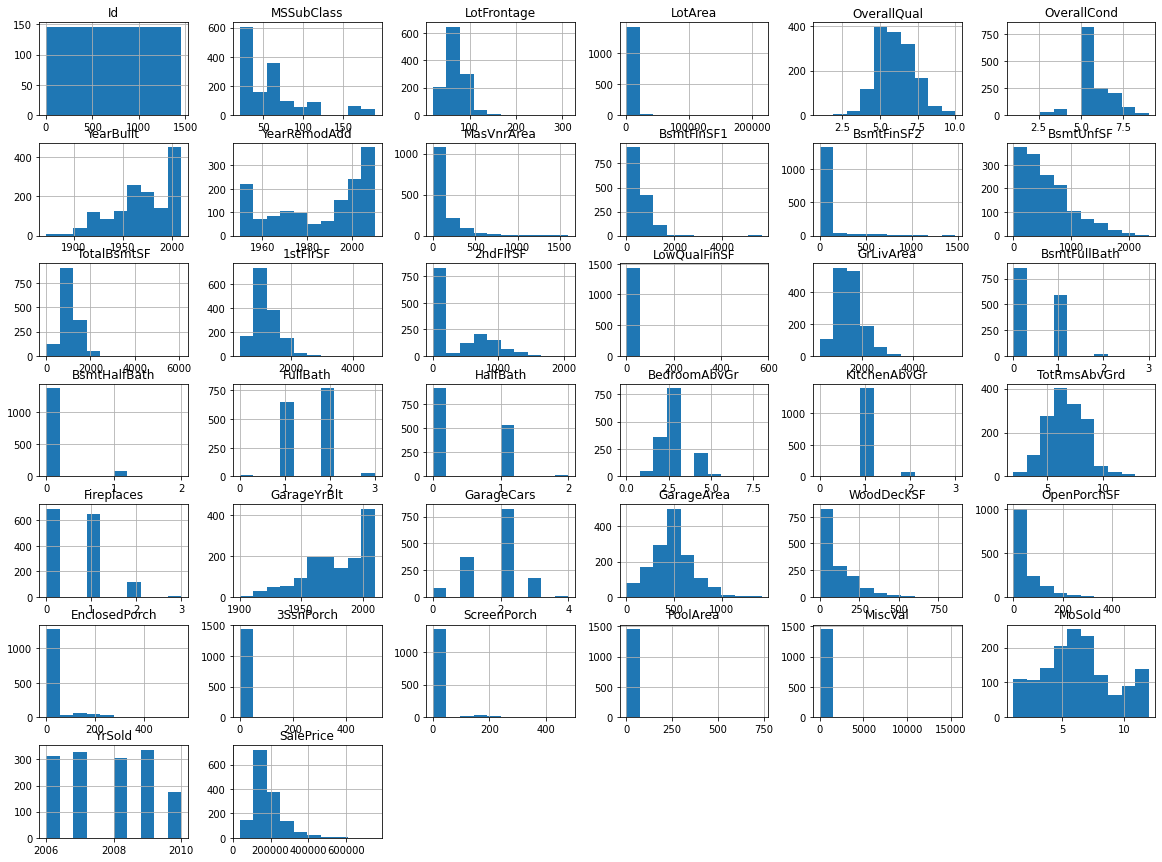

In [18]:
numeric_features_tr = train.dtypes[train.dtypes!="object"].index

train[numeric_features_tr].hist(figsize=(20,15))
plt.show()
#그래프에서 편중이 심하게 발생하는 경우 > 외도가 심하다(skew) > 정규화 작업 > 완벽한 정규화를 위해서는 IQR작업 ... 수치를 버려도 될까 의문 > 확인 필요

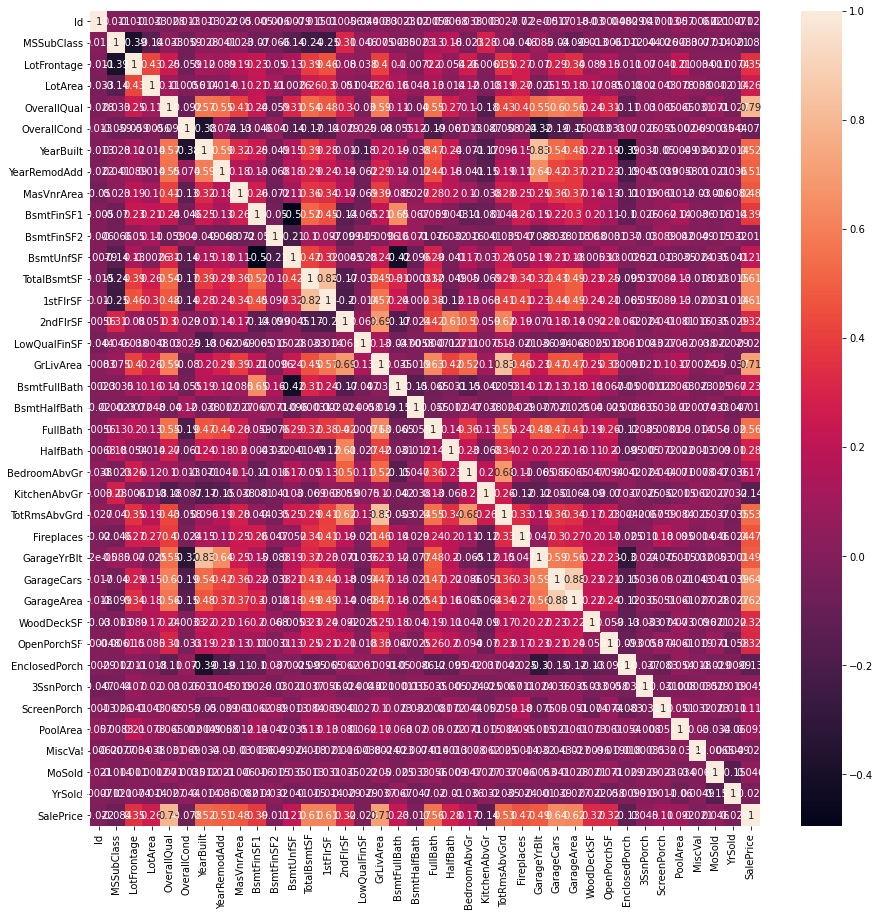

In [19]:
# 상관분석하기 >> 다중공선 우려되는 것 > PCA로 처리할 지, 피처 확인해서 단순 sum을 할 지
# 우선적으로는 타겟 데이터와 상관도가 높은 것을 EDA해야 함.
plt.figure(figsize=(15,15))
sns.heatmap(data = train[numeric_features_tr].corr(), annot=True)
plt.show()

In [20]:
# # target에 영향을 주는 상위 n개 피쳐 산점도(회귀계수) 확인 >> 회귀계수가 높을수록 영향력이 크다 >> coef가 우선기준 (corr는 참고사항)
# plt.plot(np.unique(x), np.ply1d(np.polyfit(x,y,1))(np.unique(x)))
# plt.title(col)
# plt.xlabel(col)
# plt.ylabel('prices')

In [21]:
#수치형 피쳐 > 정규화 log1
#skew 왜도값 처리(비대칭도) > 좌우의 쏠림현상 > 왜도값이 0이면 정규분포, (-)면 왼쪽으로 긴 꼬리 > 평균값보다 분포된 값들이 크다
#첨도 > 확률분포의 뾰족한 정도 > 1에 가까울수록 좋다.

In [22]:
sk_df = pd.DataFrame()

sk_df["skew"] = train[numeric_features_tr].skew()
sk_df["kurt"] = train[numeric_features_tr].kurt()

sk_df.head(40).sort_values("skew", ascending=False)

,skew,kurt
MiscVal,24.476794,701.003342
PoolArea,14.828374,223.268499
LotArea,12.207688,203.243271
3SsnPorch,10.304342,123.662379
LowQualFinSF,9.011341,83.234817
KitchenAbvGr,4.488397,21.532404
BsmtFinSF2,4.255261,20.113338
ScreenPorch,4.122214,18.439068
BsmtHalfBath,4.103403,16.396642
EnclosedPorch,3.089872,10.430766


In [23]:
# skew가 큰것들 정규화 >> 로그스케일

#### 2-2.이상치 확인

In [24]:
from collections import Counter

def detect_outliers(df, n, features):
    outliers = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outliers.extend(outlier_list_col)
    outliers = Counter(outliers) #이상치가 있는 행 카운트
    multiple_outliers = list(k for k, v in outliers.items() if v > n) #이상치값을 2개 이상 포함하는 행
    return multiple_outliers

Outliers_to_drop = detect_outliers(train, 2, numeric_features)
#이상치를 과하게 제거하면 오버피팅날 수 있다.

In [25]:
train.loc[Outliers_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,...,102,0,0,0,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,Reg,Lvl,AllPub,Corner,...,0,0,99,0,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,90,RL,91.0,11643,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,200000
634,635,90,RL,64.0,6979,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,600,6,2010,WD,Normal,144000
910,911,90,RL,80.0,11600,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2010,WD,Normal,154300
1292,1293,70,RM,60.0,6600,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,12,2009,WD,Normal,107500


#### 2-3.불필요한 피처, 행 제거

In [26]:
# #이상치 행 제거
# train.drop(Outliers_to_drop, axis=0, inplace=True)

In [27]:
#추가 불필요한 피쳐 삭제
train.drop("Id", axis=1, inplace=True)

#### 2-4.필요 피처 고르기 위한 작업

In [28]:
#saleprice와 상관관계가 높은 것들 위주로 확인
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>=0.3]
top_corr_features

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

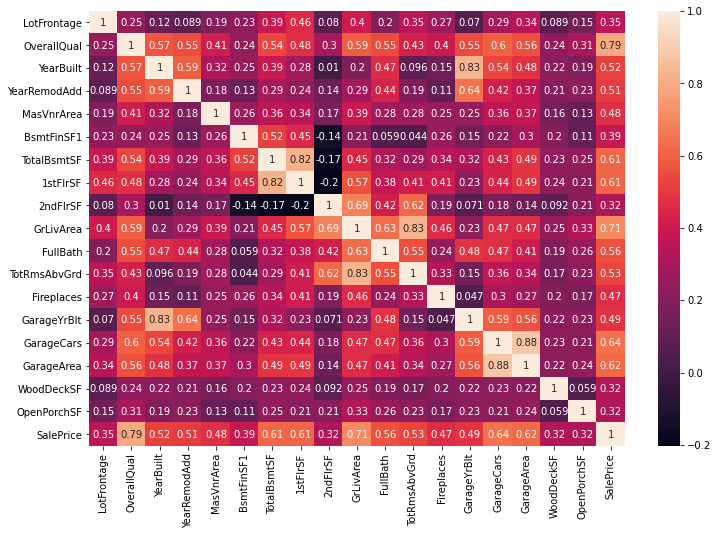

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(train[top_corr_features].corr(), annot=True)
plt.show()
#상관도가 0.5 이상인 것은 다중공선
#GarageArea, GarageCars
#YearBuilt, GarageYrBlt
#GrLivArea, TotRmsAbvGrd
#TotalBsmtSF, 1stFlrSF

In [30]:
#상관도가 높은 피처 확인
train[["GarageArea", "GarageCars", "YearBuilt", "GarageYrBlt", "GrLivArea", "TotRmsAbvGrd","TotalBsmtSF", "1stFlrSF"]] #겹치는 정보는 버리고 하나씩만 남겨도 될듯

,GarageArea,GarageCars,YearBuilt,GarageYrBlt,GrLivArea,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF
0,548,2,2003,2003.0,1710,8,856,856
1,460,2,1976,1976.0,1262,6,1262,1262
2,608,2,2001,2001.0,1786,6,920,920
3,642,3,1915,1998.0,1717,7,756,961
4,836,3,2000,2000.0,2198,9,1145,1145
...,...,...,...,...,...,...,...,...
1455,460,2,1999,1999.0,1647,7,953,953
1456,500,2,1978,1978.0,2073,7,1542,2073
1457,252,1,1941,1941.0,2340,9,1152,1188
1458,240,1,1950,1950.0,1078,5,1078,1078


In [31]:
train.drop(["GarageArea","GarageYrBlt","TotRmsAbvGrd","1stFlrSF"], axis=1, inplace=True)
test.drop(["GarageArea","GarageYrBlt","TotRmsAbvGrd","1stFlrSF"], axis=1, inplace=True)

In [32]:
#타겟과 상관도가 높은 피처 확인
train.corrwith(train["SalePrice"]).sort_values(ascending=False) #0.4이상
# OverallQual   
# GrLivArea 
# GarageCars   
# TotalBsmtSF  
# YearBuilt  
# FullBath
# YearRemodAdd
# Fireplaces
# MasVnrArea

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
TotalBsmtSF      0.613581
FullBath         0.560664
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [33]:
#상관도가 낮은 피처 삭제
drop_feature = ["BsmtFinSF1","LotFrontage","OpenPorchSF","WoodDeckSF","LotArea","2ndFlrSF","HalfBath","BsmtFullBath","BsmtUnfSF","BedroomAbvGr","MoSold","ScreenPorch","3SsnPorch",
                "PoolArea","MiscVal","YrSold","BsmtFinSF2","BsmtHalfBath","MSSubClass","LowQualFinSF","KitchenAbvGr","OverallCond","EnclosedPorch"]

train.drop(drop_feature, axis=1, inplace=True)
test.drop(drop_feature, axis=1, inplace=True)

In [34]:
nfeature = ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","YearBuilt","FullBath","YearRemodAdd","Fireplaces","MasVnrArea"]

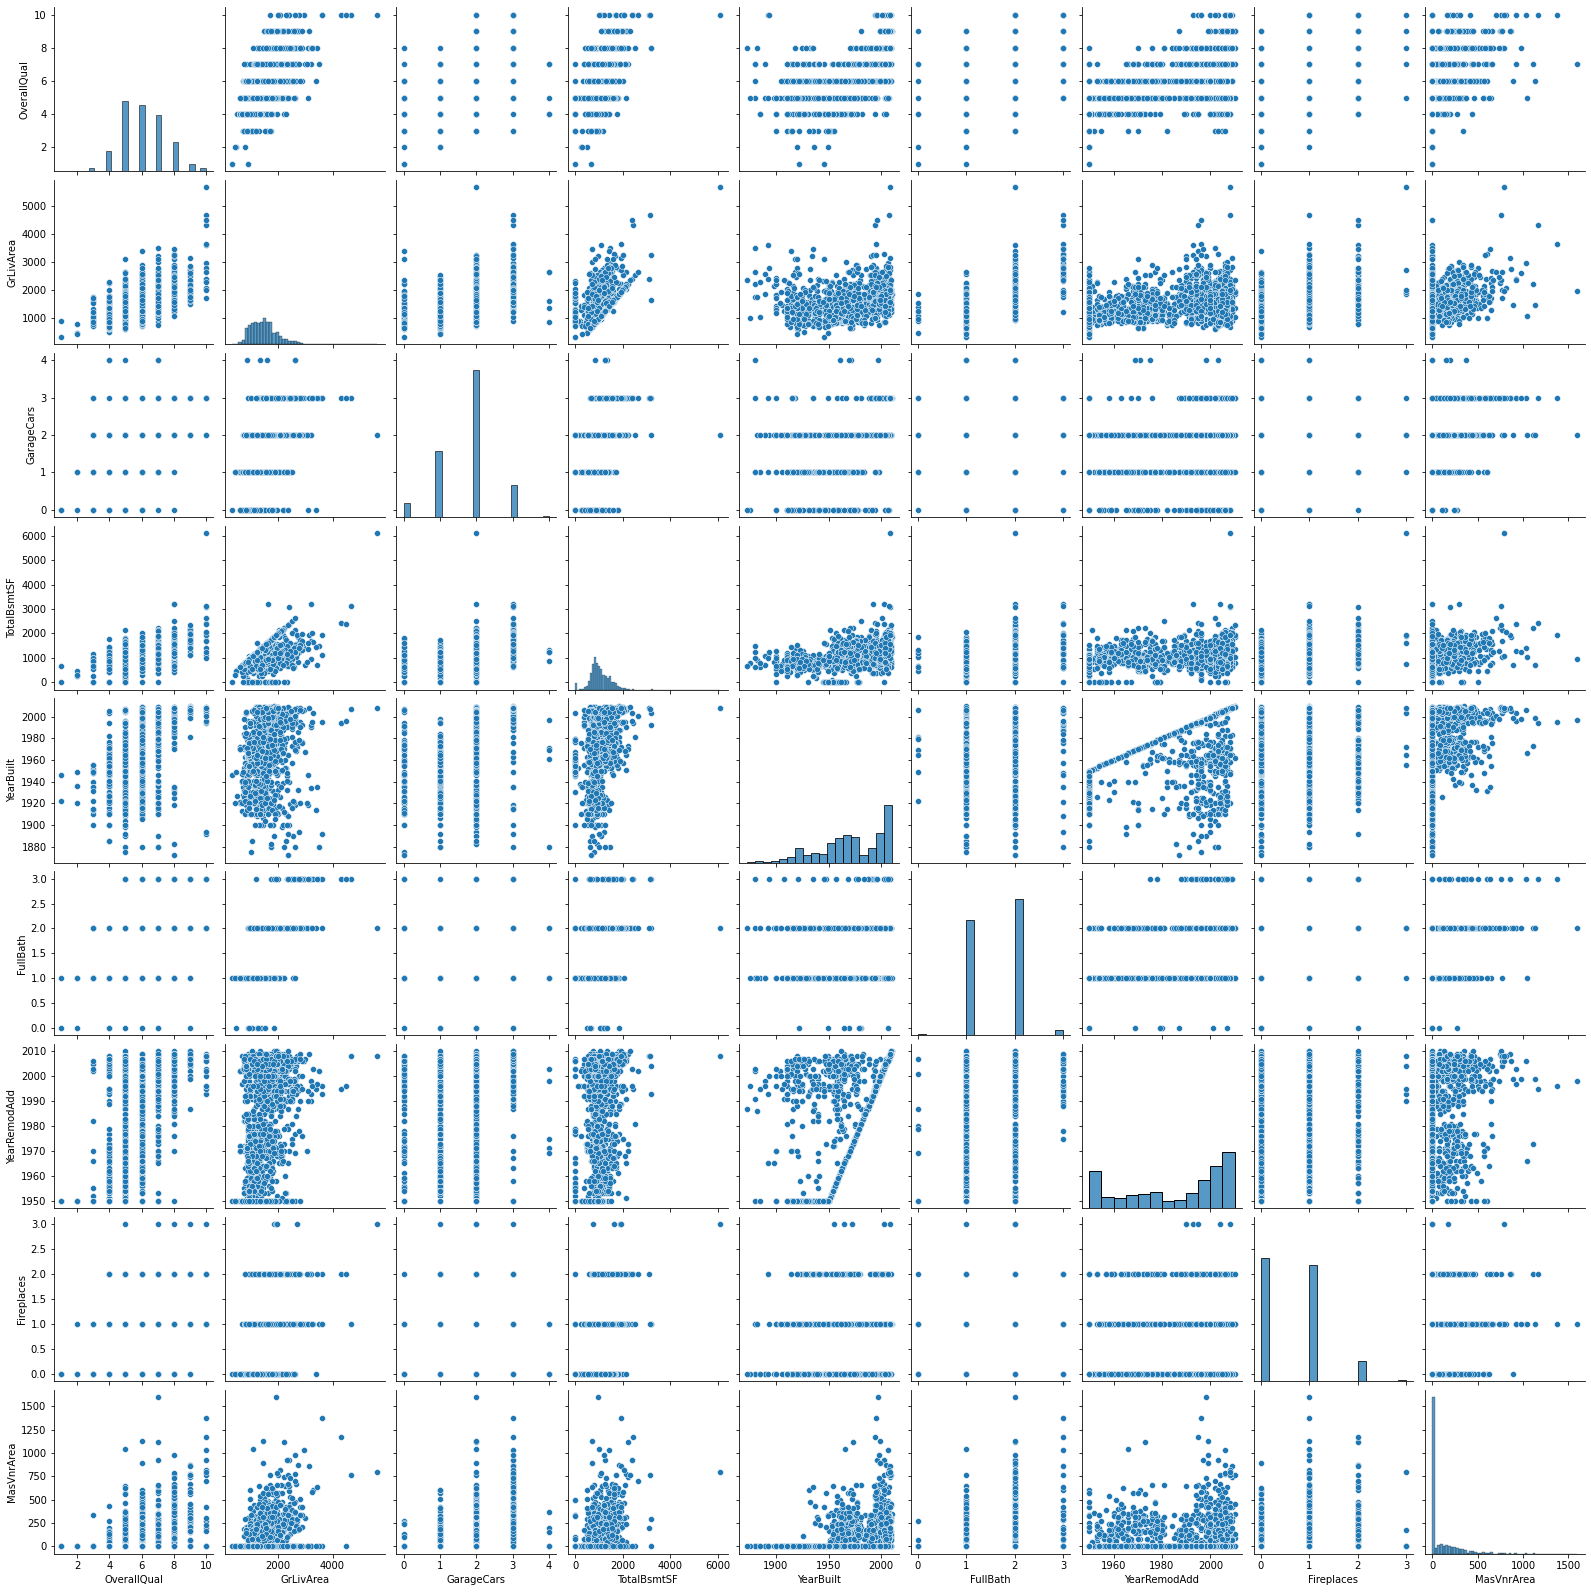

In [35]:
sns.pairplot(train[nfeature])

In [36]:
for col in nfeature:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

#### 3.object 데이터 확인

In [37]:
train.dtypes[train.dtypes=="object"].index

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

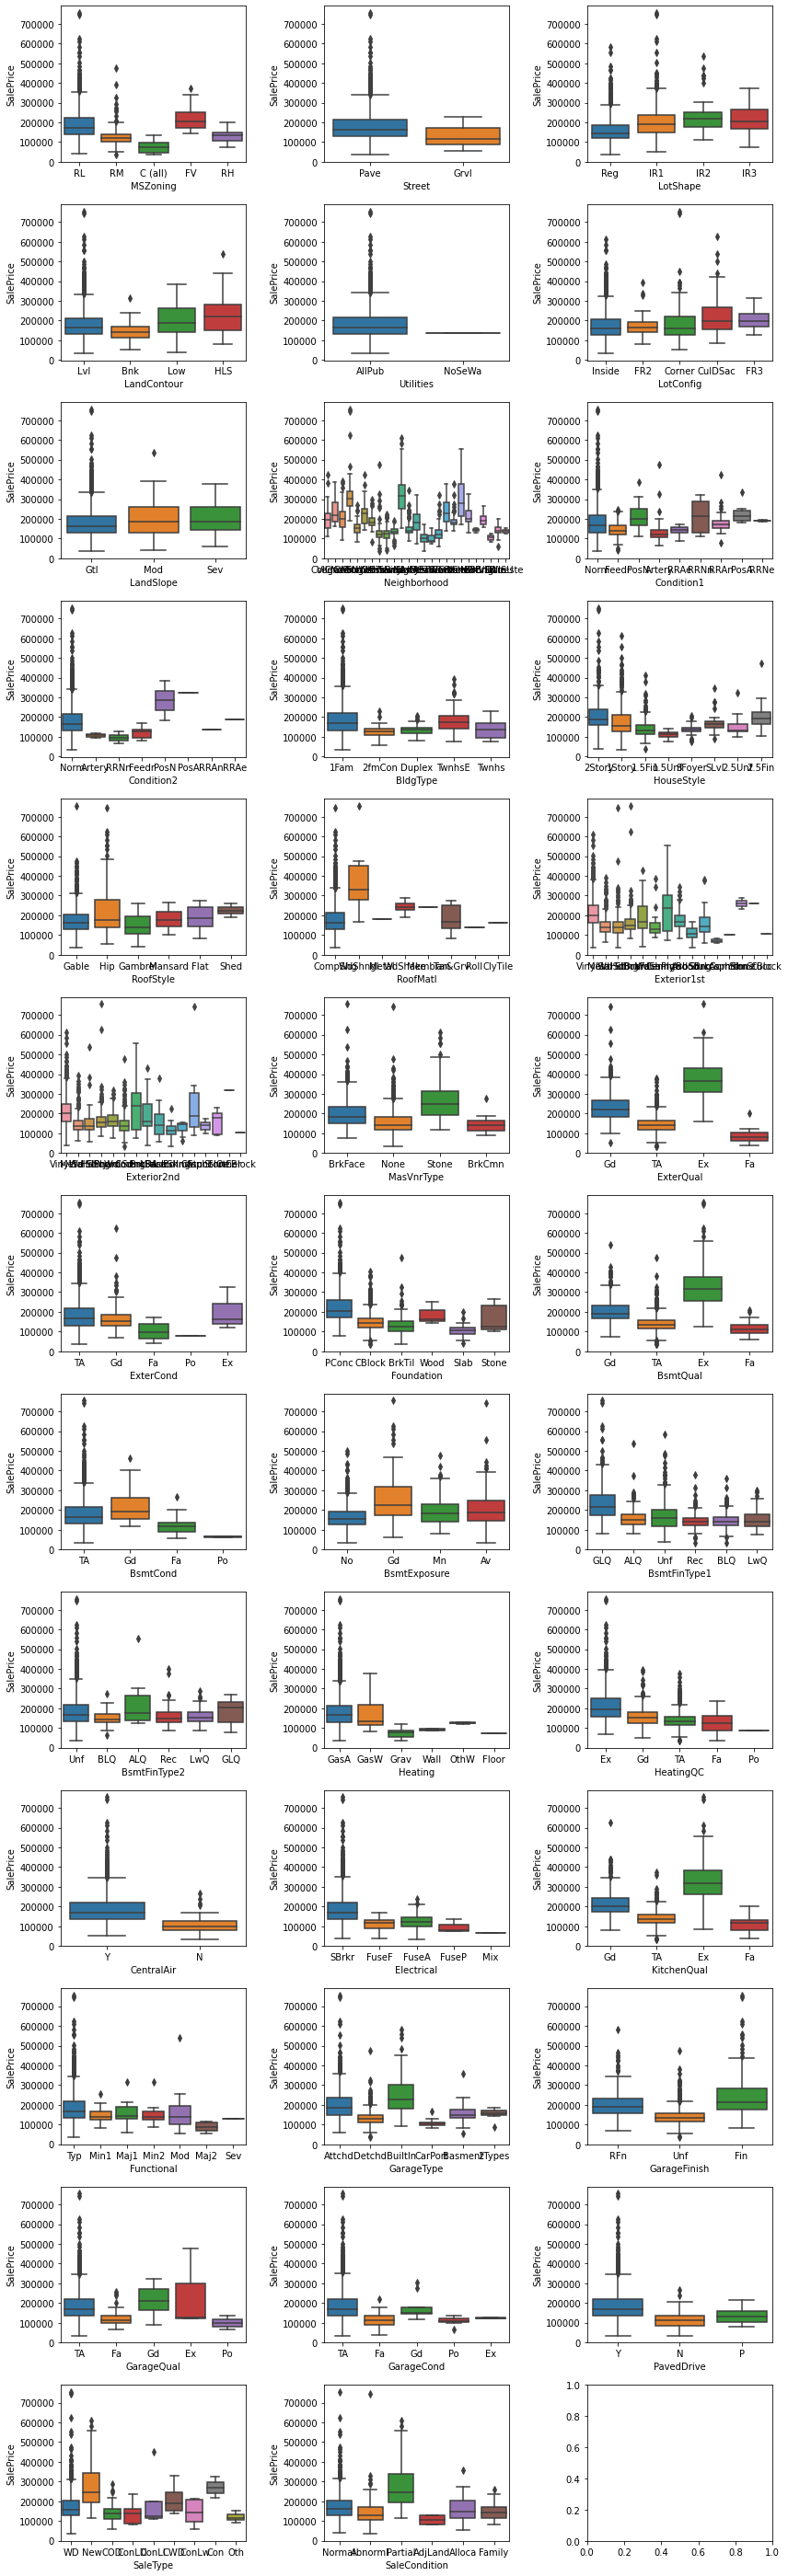

In [38]:
categorical_feats = train.dtypes[train.dtypes=="object"].index

li_cat_feats = list(categorical_feats)
nr_rows = 13
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c #지금 for문 돌리는 것이 리스트의 몇 번째인지
        if i < len(li_cat_feats): #마지막 리스트 번호까지 돌리기
            sns.boxplot(x=li_cat_feats[i], y=train["SalePrice"], data=train, ax = axs[r][c])
plt.tight_layout()
plt.show()

#주택가격에 크게 영향이 없어보이는 피처(높낮이가 크게 없는 피쳐) : "Utilities", "LandSlope", "BsmtFinType2"
#영향력이 상대적으로 적은 피쳐 : "LotShape","LandContour","LotConfig","Condition1","BldgType","HouseStyle","RoofStyle","Exterior1st","Exterior2nd","BsmtFinType1","Functional"
#영향이 큰 것 : 중앙값의 편차가 큰 것.

## 전처리

#### 정규화

In [39]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [40]:
train["SalePrice"]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

#### 1. Object to Numeric

In [41]:
#중요도가 커보이지 않는 피쳐 우선 제거
list_cat_drop = ["Utilities", "LandSlope", "BsmtFinType2","LotShape","LandContour","LotConfig","Condition1","BldgType","HouseStyle","RoofStyle","Exterior1st","Exterior2nd","BsmtFinType1","Functional"]

train.drop(list_cat_drop, axis=1, inplace=True)
test.drop(list_cat_drop, axis=1, inplace=True)

In [42]:
train.dtypes[train.dtypes=="object"].index

Index(['MSZoning', 'Street', 'Neighborhood', 'Condition2', 'RoofMatl',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
#유사(중복) 정보 삭제하기
list_cat_drop2 = ["ExterCond", "BsmtCond", "BsmtExposure", "Heating", "GarageType", "GarageFinish", "GarageCond", "PavedDrive", "SaleCondition"]
train.drop(list_cat_drop2, axis=1, inplace=True)
test.drop(list_cat_drop2, axis=1, inplace=True)

In [44]:
train[train.dtypes[train.dtypes=="object"].index].describe()

,MSZoning,Street,Neighborhood,Condition2,RoofMatl,MasVnrType,ExterQual,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,GarageQual,SaleType
count,1460,1460,1460,1460,1460,1452,1460,1460,1423,1460,1460,1459,1460,1379,1460
unique,5,2,25,8,8,4,4,6,4,5,2,5,4,5,9
top,RL,Pave,NAmes,Norm,CompShg,None,TA,PConc,TA,Ex,Y,SBrkr,TA,TA,WD
freq,1151,1454,225,1445,1434,864,906,647,649,741,1365,1334,735,1311,1267


In [45]:
#결측 None으로 채우기
na_cols = train.dtypes[train.dtypes=="object"].index

for col in na_cols:
    train[col].fillna('None',inplace=True)
    test[col].fillna('None',inplace=True)

In [46]:
train[train.dtypes[train.dtypes=="object"].index].describe()

,MSZoning,Street,Neighborhood,Condition2,RoofMatl,MasVnrType,ExterQual,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,GarageQual,SaleType
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,25,8,8,4,4,6,5,5,2,6,4,6,9
top,RL,Pave,NAmes,Norm,CompShg,None,TA,PConc,TA,Ex,Y,SBrkr,TA,TA,WD
freq,1151,1454,225,1445,1434,872,906,647,649,741,1365,1334,735,1311,1267


In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

list_cat = ["MSZoning","Street","Condition2","RoofMatl","MasVnrType","ExterQual","Foundation",
            "BsmtQual","HeatingQC","CentralAir","Electrical","KitchenQual","GarageQual","SaleType"]
encoder = LabelEncoder()  #글자-->숫자

for col in list_cat :    
    train["LE_"+col] = encoder.fit_transform(train[col])
    test["LE_"+col] = encoder.fit_transform(test[col])

In [48]:
#Neighborhood
df_Ne = pd.get_dummies(train["Neighborhood"])
df_Ne2 = pd.get_dummies(test["Neighborhood"])

In [49]:
pd.get_dummies(train[train.dtypes[train.dtypes=="object"].index])

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,GarageQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1456,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1457,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1458,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


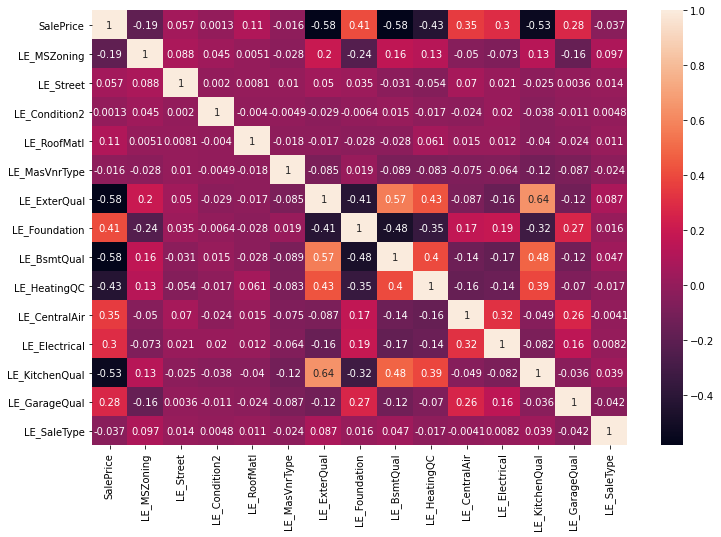

In [50]:
list_LE = ["SalePrice","LE_MSZoning","LE_Street","LE_Condition2","LE_RoofMatl","LE_MasVnrType","LE_ExterQual","LE_Foundation",
            "LE_BsmtQual","LE_HeatingQC","LE_CentralAir","LE_Electrical","LE_KitchenQual","LE_GarageQual","LE_SaleType"]

plt.figure(figsize=(12,8))
sns.heatmap(train[list_LE].corr(), annot=True)
plt.show()
#SalePrice와 상관관계가 높은 것들(0.2이상) : LE_MSZoning,LE_ExterQual,LE_Foundation,LE_BsmtQual,LE_HeatingQC,LE_CentralAir,LE_Electrical,LE_KitchenQual,LE_GarageQual
#서로 상관관계가 높은 것들 : 다중공선 : LE_BsmtQual,LE_Foundation,LE_ExterQual

In [51]:
# train.drop(["LE_BsmtQual","LE_Foundation"], axis=1, inplace=True)
# test.drop(["LE_BsmtQual","LE_Foundation"], axis=1, inplace=True)

In [53]:
train.drop(["LE_Street","LE_Condition2","LE_RoofMatl","LE_MasVnrType","LE_SaleType"], axis=1, inplace=True)
test.drop(["LE_Street","LE_Condition2","LE_RoofMatl","LE_MasVnrType","LE_SaleType"], axis=1, inplace=True)

In [54]:
#불필요한 피처 제거
train.drop(train.dtypes[train.dtypes=="object"].index, axis=1, inplace=True)
test.drop(test.dtypes[test.dtypes=="object"].index, axis=1, inplace=True)

#### 2.수치형데이터

In [55]:
train[nfeature].describe()
#스케일링 > GrLivArea, TotalBsmtSF, MasVnrArea
#구간화 > YearBuilt, YearRemodAdd

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,YearRemodAdd,Fireplaces,MasVnrArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,1971.267808,1.565068,1984.865753,0.613014,103.117123
std,1.382997,525.480383,0.747315,438.705324,30.202904,0.550916,20.645407,0.644666,180.731373
min,1.000000,334.000000,0.000000,0.000000,1872.000000,0.000000,1950.000000,0.000000,0.000000
25%,5.000000,1129.500000,1.000000,795.750000,1954.000000,1.000000,1967.000000,0.000000,0.000000
50%,6.000000,1464.000000,2.000000,991.500000,1973.000000,2.000000,1994.000000,1.000000,0.000000
75%,7.000000,1776.750000,2.000000,1298.250000,2000.000000,2.000000,2004.000000,1.000000,164.250000
max,10.000000,5642.000000,4.000000,6110.000000,2010.000000,3.000000,2010.000000,3.000000,1600.000000


In [56]:
#스케일링
scale_features = ["GrLivArea", "TotalBsmtSF", "MasVnrArea"]
for sf in scale_features:
    train[sf] = np.log1p(train[sf])
    test[sf] = np.log1p(test[sf])

In [57]:
#구간화
def Year_bining(x) :  #df["Fear"]
    Year = 0
    if x <= 1950:
        Year = 1
    elif  x <= 1970:
        Year = 2
    elif  x <= 1990:
        Year = 3
    else:
        Year = 4
    return  Year   
train["T_YearBuilt"] = train["YearBuilt"].apply(lambda x : Year_bining(x))
test["T_YearBuilt"] = test["YearBuilt"].apply(lambda x : Year_bining(x))
train["T_YearRemodAdd"] = train["YearRemodAdd"].apply(lambda x : Year_bining(x))
test["T_YearRemodAdd"] = test["YearRemodAdd"].apply(lambda x : Year_bining(x))

In [58]:
train[["YearBuilt","T_YearBuilt","YearRemodAdd","T_YearRemodAdd"]].describe()

,YearBuilt,T_YearBuilt,YearRemodAdd,T_YearRemodAdd
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,2.669178,1984.865753,3.117123
std,30.202904,1.193199,20.645407,1.088595
min,1872.000000,1.000000,1950.000000,1.000000
25%,1954.000000,2.000000,1967.000000,2.000000
50%,1973.000000,3.000000,1994.000000,4.000000
75%,2000.000000,4.000000,2004.000000,4.000000
max,2010.000000,4.000000,2010.000000,4.000000


In [59]:
train.drop(["YearBuilt","YearRemodAdd"], axis=1, inplace=True)
test.drop(["YearBuilt","YearRemodAdd"], axis=1, inplace=True)

#### 3.데이터확인

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OverallQual     1460 non-null   int64  
 1   MasVnrArea      1460 non-null   float64
 2   TotalBsmtSF     1460 non-null   float64
 3   GrLivArea       1460 non-null   float64
 4   FullBath        1460 non-null   int64  
 5   Fireplaces      1460 non-null   int64  
 6   GarageCars      1460 non-null   int64  
 7   SalePrice       1460 non-null   float64
 8   LE_MSZoning     1460 non-null   int32  
 9   LE_ExterQual    1460 non-null   int32  
 10  LE_Foundation   1460 non-null   int32  
 11  LE_BsmtQual     1460 non-null   int32  
 12  LE_HeatingQC    1460 non-null   int32  
 13  LE_CentralAir   1460 non-null   int32  
 14  LE_Electrical   1460 non-null   int32  
 15  LE_KitchenQual  1460 non-null   int32  
 16  LE_GarageQual   1460 non-null   int32  
 17  T_YearBuilt     1460 non-null   i

#### * 점수 찍어보기 *

In [61]:
y_df = train["SalePrice"]
X_df = train.drop("SalePrice", axis=1)
X_train , X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, shuffle=True, random_state=121)
print(X_train.shape , y_train.shape,X_val.shape,  y_val.shape )

model1 = LinearRegression()
model1.fit(X_train, y_train)
pred = model1.predict(X_val)
mse = mean_squared_error(y_val, pred, squared=True)
rmse = mean_squared_error(y_val, pred, squared=False)
print(f'MSE:{mse:.5f}  RMSE:{rmse:.5f}')

(1168, 18) (1168,) (292, 18) (292,)
MSE:0.02156  RMSE:0.14683


In [62]:
# LinearRegression()
lasso = Lasso(alpha=1.0) # a*|W|
ridge = Ridge(alpha=1.0) # a*W^2
elsnet = ElasticNet(alpha=1.0, l1_ratio=0.2) # 0.2(a*|W|) + 0.8(a*W^2)

In [63]:
models = [lasso, ridge, elsnet]
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mse = mean_squared_error(y_val, pred, squared=True)
    rmse = mean_squared_error(y_val, pred, squared=False)
    print(f"{model.__class__.__name__} MSE:{mse:.5f} RMSE:{rmse:.5f}")
# Lasso MSE:0.11372 RMSE:0.33723
# Ridge MSE:0.02569 RMSE:0.16029
# ElasticNet MSE:0.06889 RMSE:0.26246

Lasso MSE:0.15270 RMSE:0.39077
Ridge MSE:0.02158 RMSE:0.14691
ElasticNet MSE:0.08302 RMSE:0.28813


In [64]:
for model in models:
    score_list = cross_val_score(model, X_df, y=y_df, scoring="neg_mean_squared_error", cv=5)
    score_list = -1*score_list

print(score_list, score_list.mean())

[0.08259772 0.10607404 0.09597532 0.07852022 0.08456393] 0.08954624779584855


In [65]:
for model in models:
    score_list = cross_validate(model, X_df, y=y_df,
                                scoring={"mse":"neg_mean_squared_error",
                                        "rmse":"neg_root_mean_squared_error"},
                                return_train_score=False, cv=5)

    mse_score = score_list["test_mse"]*-1
    rmse_score = score_list["test_rmse"]*-1
    print(f"{model.__class__.__name__} MSE:{mse_score.mean():.5f} RMSE:{rmse_score.mean():.5f}")
# Lasso MSE:0.13842 RMSE:0.37157
# Ridge MSE:0.02276 RMSE:0.15073
# ElasticNet MSE:0.08360 RMSE:0.28850

Lasso MSE:0.15963 RMSE:0.39923
Ridge MSE:0.02606 RMSE:0.16108
ElasticNet MSE:0.08955 RMSE:0.29878


In [66]:
cv_model =GridSearchCV(ridge, param_grid={"alpha":[0.01, 1.0, 5.0, 10.0]},
                       scoring="neg_root_mean_squared_error", cv=5, refit=True)

cv_model.fit(X_train, y_train)
print(f"RMSE:{cv_model.best_score_*-1:.5f}")
print(cv_model.best_params_)

RMSE:0.16535
{'alpha': 1.0}


In [75]:
#알파값 변화에 따른 coef(회귀계수) 확인
alpha = [0.01, 1.0, 5.0, 10.0, 100.0]
coef_df = pd.DataFrame()
for a in alpha:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_val)
    score = mean_squared_error(y_val, pred, squared=False)    
    coef_df["alpha"+str(a)]=ridge.coef_
    print(f"alpha:{a} \t RMSE:{score:.4f}")
    
coef_df.index=X_train.columns

alpha:0.01 	 RMSE:0.1468
alpha:1.0 	 RMSE:0.1469
alpha:5.0 	 RMSE:0.1473
alpha:10.0 	 RMSE:0.1478
alpha:100.0 	 RMSE:0.1555


In [77]:
coef_df.sort_values("alpha0.01", ascending=False)

,alpha0.01,alpha1.0,alpha5.0,alpha10.0,alpha100.0
GrLivArea,0.354670,0.348088,0.324211,0.299337,0.143009
LE_CentralAir,0.159275,0.156582,0.146591,0.135803,0.060081
GarageCars,0.082126,0.082414,0.083382,0.084238,0.081092
OverallQual,0.074301,0.074858,0.076888,0.079025,0.092536
Fireplaces,0.065313,0.066071,0.068766,0.071460,0.080718
TotalBsmtSF,0.033186,0.033377,0.034054,0.034724,0.036960
T_YearRemodAdd,0.030921,0.031156,0.031994,0.032841,0.036162
LE_Foundation,0.015171,0.015380,0.016084,0.016711,0.015819
FullBath,0.009817,0.011653,0.018173,0.024695,0.052660
T_YearBuilt,0.007630,0.007112,0.005306,0.003563,-0.000809


In [69]:
alpha = [0.01, 1.0, 5.0, 10.0, 100.0]
coef_df = pd.DataFrame()
for a in alpha:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_val)
    score = mean_squared_error(y_val, pred, squared=False)    
    coef_df["alpha"+str(a)]=lasso.coef_
    print(f"alpha:{a} \t RMSE:{score:.4f}")
    
coef_df.index=X_train.columns

alpha:0.01 	 RMSE:0.1553
alpha:1.0 	 RMSE:0.3908
alpha:5.0 	 RMSE:0.3908
alpha:10.0 	 RMSE:0.3908
alpha:100.0 	 RMSE:0.3908


In [70]:
coef_df
#l1 규제를 가했을 때 규제가 0이 되는 것이 분석에 주요하지 않아서 0으로 삭제된 것.

,alpha0.01,alpha1.0,alpha5.0,alpha10.0,alpha100.0
OverallQual,0.102312,0.0,0.0,0.0,0.0
MasVnrArea,0.004130,0.0,0.0,0.0,0.0
TotalBsmtSF,0.027036,0.0,0.0,0.0,0.0
GrLivArea,0.239805,0.0,0.0,0.0,0.0
FullBath,0.001011,0.0,0.0,0.0,0.0
Fireplaces,0.065074,0.0,0.0,0.0,0.0
GarageCars,0.082767,0.0,0.0,0.0,0.0
LE_MSZoning,-0.000000,-0.0,-0.0,-0.0,-0.0
LE_ExterQual,-0.000000,-0.0,-0.0,-0.0,-0.0
LE_Foundation,0.000000,0.0,0.0,0.0,0.0


In [72]:
#coef_df에서 확인 것으로 불필요한 피쳐 제거 후 점수 확인 >> 차이 없음.
topn = ["LE_MSZoning","LE_ExterQual","LE_Foundation","LE_CentralAir"]

alpha = [0.01, 1.0, 5.0, 10.0, 100.0]
coef_df = pd.DataFrame()
for a in alpha:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train.drop(topn, axis=1), y_train)
    pred = lasso.predict(X_val.drop(topn, axis=1))
    score = mean_squared_error(y_val, pred, squared=False)    
    print(f"alpha:{a} \t RMSE:{score:.4f}")

alpha:0.01 	 RMSE:0.1553
alpha:1.0 	 RMSE:0.3908
alpha:5.0 	 RMSE:0.3908
alpha:10.0 	 RMSE:0.3908
alpha:100.0 	 RMSE:0.3908


## 예측파일 만들어보기

In [62]:
pred = cv_model.predict(X_val)
print(pred[:5])
predo = np.round(np.expm1(pred),1)
print(predo[:5])

[11.60677852 11.93236788 12.27751788 11.89150528 11.89448851]
[109838.8 152110.3 214810.9 146019.9 146456.2]


In [65]:
test_Id = test["Id"]
test = test.drop("Id", axis=1)

In [67]:
pred = cv_model.predict(test)
pred_for_submit = np.round(np.expm1(pred),1)

In [68]:
mydic = {"Id" : test_Id.values,
 "SalePrice" : pred_for_submit }

final_df = pd.DataFrame(mydic)
final_df.head()

,Id,SalePrice
0,1461,100521.4
1,1462,133315.5
2,1463,159301.1
3,1464,185202.3
4,1465,192716.2


In [69]:
final_df.to_csv("lsb_submission.csv", index=False)
#콘솔 점수 : 0.14730
#리더보드 점수 : 0.18024

## 점수 개선하기

In [79]:
#neighbor 정보 추가하기
train_ne = pd.concat([train, df_Ne], axis=1)
test_ne = pd.concat([test, df_Ne2], axis=1)

y_df = train_ne["SalePrice"]
X_df = train_ne.drop("SalePrice", axis=1)
X_train , X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, shuffle=True, random_state=121)
print(X_train.shape , y_train.shape,X_val.shape,  y_val.shape )

model1 = LinearRegression()
model1.fit(X_train, y_train)
pred = model1.predict(X_val)
mse = mean_squared_error(y_val, pred, squared=True)
rmse = mean_squared_error(y_val, pred, squared=False)
print(f'MSE:{mse:.5f}  RMSE:{rmse:.5f}')
#MSE:0.02156  RMSE:0.14683

(1168, 43) (1168,) (292, 43) (292,)
MSE:0.01881  RMSE:0.13716


In [80]:
# LinearRegression()
lasso = Lasso(alpha=1.0) # a*|W|
ridge = Ridge(alpha=1.0) # a*W^2
elsnet = ElasticNet(alpha=1.0, l1_ratio=0.2) # 0.2(a*|W|) + 0.8(a*W^2)

In [81]:
models = [lasso, ridge, elsnet]
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mse = mean_squared_error(y_val, pred, squared=True)
    rmse = mean_squared_error(y_val, pred, squared=False)
    print(f"{model.__class__.__name__} MSE:{mse:.5f} RMSE:{rmse:.5f}")
# Lasso MSE:0.11372 RMSE:0.33723
# Ridge MSE:0.02569 RMSE:0.16029
# ElasticNet MSE:0.06889 RMSE:0.26246

Lasso MSE:0.15270 RMSE:0.39077
Ridge MSE:0.01860 RMSE:0.13638
ElasticNet MSE:0.08302 RMSE:0.28813


In [82]:
for model in models:
    score_list = cross_val_score(model, X_df, y=y_df, scoring="neg_mean_squared_error", cv=5)
    score_list = -1*score_list

print(score_list, score_list.mean())

[0.08259772 0.10607404 0.09597532 0.07852022 0.08456393] 0.08954624779584855


In [83]:
for model in models:
    score_list = cross_validate(model, X_df, y=y_df,
                                scoring={"mse":"neg_mean_squared_error",
                                        "rmse":"neg_root_mean_squared_error"},
                                return_train_score=False, cv=5)

    mse_score = score_list["test_mse"]*-1
    rmse_score = score_list["test_rmse"]*-1
    print(f"{model.__class__.__name__} MSE:{mse_score.mean():.5f} RMSE:{rmse_score.mean():.5f}")
# Lasso MSE:0.13842 RMSE:0.37157
# Ridge MSE:0.02276 RMSE:0.15073
# ElasticNet MSE:0.08360 RMSE:0.28850

Lasso MSE:0.15963 RMSE:0.39923
Ridge MSE:0.02171 RMSE:0.14693
ElasticNet MSE:0.08955 RMSE:0.29878


In [84]:
cv_model =GridSearchCV(ridge, param_grid={"alpha":[0.01, 1.0, 5.0, 10.0]},
                       scoring="neg_root_mean_squared_error", cv=5, refit=True)

cv_model.fit(X_train, y_train)
print(f"RMSE:{cv_model.best_score_*-1:.5f}")
print(cv_model.best_params_)

RMSE:0.15042
{'alpha': 1.0}


In [85]:
#알파값 변화에 따른 coef(회귀계수) 확인
alpha = [0.01, 1.0, 5.0, 10.0, 100.0]
coef_df = pd.DataFrame()
for a in alpha:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_val)
    score = mean_squared_error(y_val, pred, squared=False)    
    coef_df["alpha"+str(a)]=ridge.coef_
    print(f"alpha:{a} \t RMSE:{score:.4f}")
    
coef_df.index=X_train.columns

alpha:0.01 	 RMSE:0.1371
alpha:1.0 	 RMSE:0.1364
alpha:5.0 	 RMSE:0.1360
alpha:10.0 	 RMSE:0.1368
alpha:100.0 	 RMSE:0.1500


In [87]:
ridge = Ridge(alpha=5.0)

ridge.fit(X_train, y_train)
pred = ridge.predict(X_val)
print(pred[:5])
predo = np.round(np.expm1(pred),1)
print(predo[:5])

[11.58371359 12.51282104 11.66525459 12.54245397 11.87088571]
[107334.4 271798.8 116453.3 279973.5 143039.9]


In [89]:
test_ne_Id = test["Id"]
test_ne = test_ne.drop("Id", axis=1)

In [90]:
ridge = Ridge(alpha=5.0)
ridge.fit(X_df, y_df)
pred = ridge.predict(test_ne)
pred_for_submit = np.round(np.expm1(pred),1)

In [91]:
mydic = {"Id" : test_ne_Id.values,
 "SalePrice" : pred_for_submit }

final_df = pd.DataFrame(mydic)
final_df.head()

,Id,SalePrice
0,1461,107425.1
1,1462,143510.7
2,1463,162905.6
3,1464,181717.5
4,1465,228353.2


In [92]:
final_df.to_csv("lsb_submission2.csv", index=False)
#콘솔 점수 : 0.1360
#리더보드 점수 : 0.15282

In [ ]:
#특징있는 피쳐 가공을 제대로 하는 것이 분석과제 점수 개선의 핵심
#확실하게 근거있는 파생변수를 만드는 것이 중요 >> 도메인 지식이 필요.

#### 다시 생각해보기

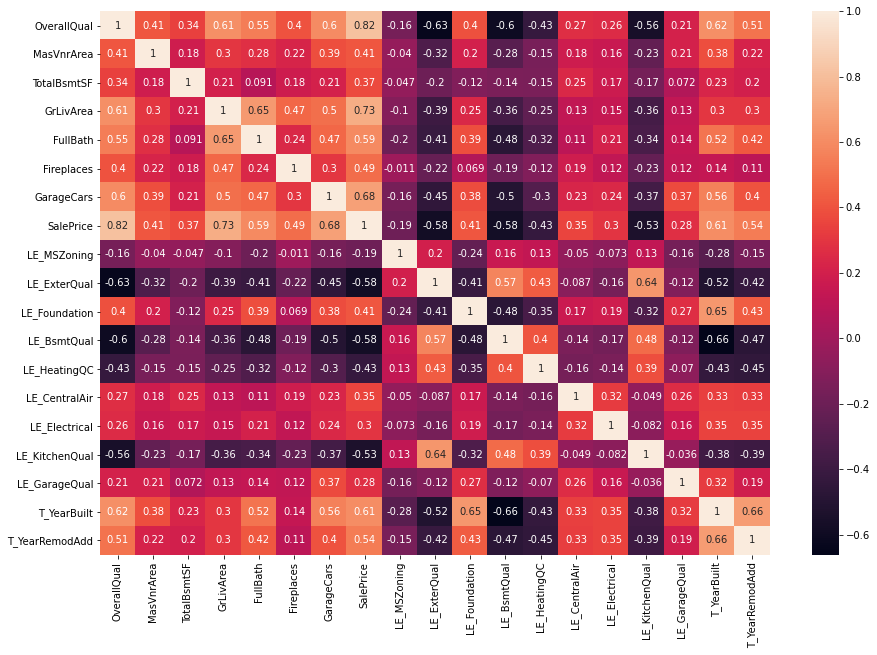

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True)
plt.show()
#SalePrice와 0.5 이상의 상관관계를 갖는 것은 다중공선으로 처리해야할 것 > PCA시도

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(train)
train_pca = pca.transform(train)
train_pca.shape

(1326, 2)

In [83]:
pca_df = pd.DataFrame(data=train_pca, columns=["pc1", "pc2"])
pca_df["SalePrice"] = y_df
pca_df.head()

,pc1,pc2,SalePrice
0,3.995434,-0.064625,12.247699
1,-1.085003,-2.236524,12.109016
2,3.927366,-0.201809,12.317171
3,-1.939933,-0.625677,11.849405
4,5.021401,-0.128709,12.429220


#### 정리

- 가공을 위해서는 기초 도메인이 매우 중요하다
- 타입별, 상관도별 자세히 확인
- 총평의 경우에는 5,4,3,2,1,0으로 인코딩 > 총평이 높을 수록 좋음 > 정성적 평가 11개
- 정량평가 > 방 개수, 면적 등등
- 가중치는 정량평가(객관적 수치)에 더 높이 주어야 한다. 정성과 정량이 있으면 정량을 남기는 것이 더 낫다.
- 평가점수를 Sum줄 때 임의로 가중치 조절
- 방개수같은것들도 FullBath, HalfBath 이런 것들을 수치화시켜서 방 개수를 어떻게 할 지 생각해볼 것.,
- 파생변수 Alley(있는지 없는지에 따라 다른 변수값의 존재 유무가 유의미), 차고지가 있다 없다 > 공용주택, 일반주택 확인 가능, 수영장, 기타 자산, 울타리 등등
- neighborhood가 굉장히 중요한 변수다.
- 피쳐 선별
1. 결측 관련 파생변수 생성
2. 유사 컬럼이름 찾기 > 유사도가 높은 것은 하나로 처리 : 합산, 평균 등 / 타겟에 큰 영향이 없는 것은 이러한 가공에서 배재
3. 매물 총평에 관한 것(정성평가) / 외부시설 / 내부시설 / 면적(정량평가) / 외장재 / 날짜 등등
- 참고 Porch 합산, bath 합산 등등 설명력을 높여줌.